In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
# データの取得
data = sm.datasets.co2.load_pandas().data
data.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


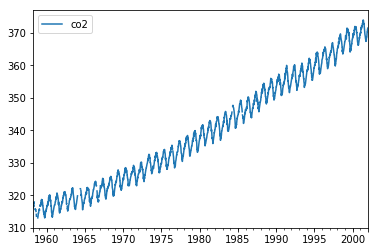

In [3]:
# データの確認
data.plot()

In [4]:
#五数要約
data.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a30453dd8>]],
      dtype=object)

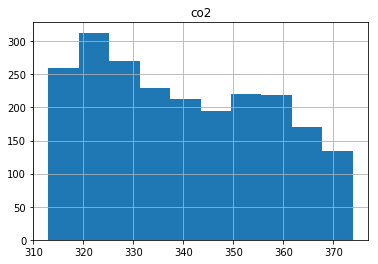

In [5]:
# histgramの確認
data.hist()

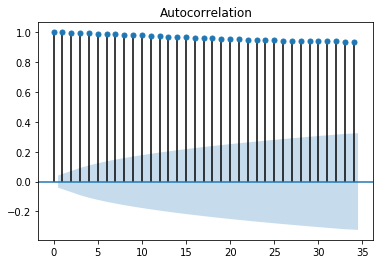

In [9]:
# 自己相関係数
# グラフに表示されている薄い青の帯: Bartlett’s formulaの95%信頼区間
from statsmodels.graphics.tsaplots import plot_acf
s = data.fillna(method='ffill') # 欠損値の補完
s = s['co2']
plot_acf(s);

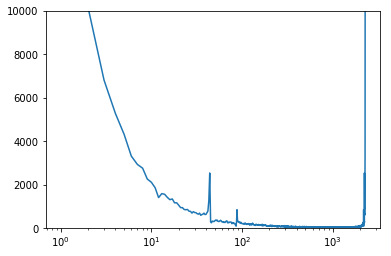

In [10]:
# 振幅スペクトルを計算
from numpy.fft import fft, fftn, ifftn, fftfreq
import numpy as np
a_s = s.values
F = fft(a_s)

F_abs = np.abs(F)

ax = plt.gca()
ax.set_xscale('log')
plt.ylim(0, 10000)
plt.plot(F_abs)

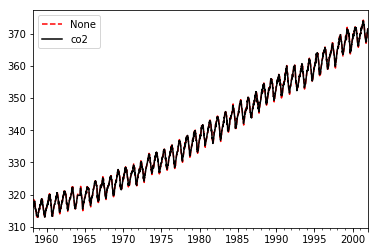

In [11]:
# holt winters法
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(s, seasonal_periods=4, trend='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red',legend=True)
s.plot(color='black', legend=True)
#fit1.forecast(12).plot(style='--', marker='o', color='red', )

plt.show()